In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Preprocessing
from sklearn.preprocessing import OrdinalEncoder

#Metrics
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [28]:
#Importing the dataset
dataset = pd.read_csv('vehicles.csv')

## Dataset analization and preprocessing

In [29]:
#Inspecting the dataset
dataset.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [30]:
#Shape of the dataset
dataset.shape

(426880, 26)

In [31]:
#Checking for missing values
dataset.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [32]:
#Dropping the columns irrelevant to the analysis and columns with a lot of missing values
dataset.drop(["id", "url", "region", "region_url", "cylinders", "title_status", "VIN", "size", "image_url", "description", "county", "state", "lat", "long", "posting_date"], axis=1, inplace=True)
dataset.head()

,price,year,manufacturer,model,condition,fuel,odometer,transmission,drive,type,paint_color
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#Removing the rows with missing values
dataset.dropna(inplace=True)

#ALL of this will be done later in a data cleaning segment in a bettwr way

#Removing the rows with price < 100 or price > 40000
# dataset.drop(dataset[dataset.price < 100].index, inplace=True)
# dataset.drop(dataset[dataset.price > 40000].index, inplace=True)


#Removing the rows with odometer < 100
# dataset.drop(dataset[dataset.odometer < 100].index, inplace=True)

# #Removing the rows with transmission = other
# dataset.drop(dataset[dataset.transmission == 'other'].index, inplace=True)

#Removing the rows with year < 1990
# dataset.drop(dataset[dataset.year < 1990].index, inplace=True)

# #Removeing the rows with fuel = other
# dataset.drop(dataset[dataset.fuel == 'other'].index, inplace=True)

dataset.shape

(142117, 11)

In [34]:
#Transform the "year" column into "age" column
dataset['age'] = 2023 - dataset['year']
dataset.drop(['year'], axis=1, inplace=True)

In [35]:
#Details of numerical features
dataset.describe()

,price,odometer,age
count,1.421170e+05,1.421170e+05,142117.000000
mean,5.425552e+04,1.019299e+05,12.439793
std,1.036334e+07,2.012365e+05,9.182634
min,0.000000e+00,0.000000e+00,1.000000
25%,6.300000e+03,4.100500e+04,7.000000
50%,1.299500e+04,9.300000e+04,10.000000
75%,2.459000e+04,1.400000e+05,16.000000
max,3.736929e+09,1.000000e+07,123.000000


In [36]:
#Details of all features
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142117 entries, 31 to 426878
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         142117 non-null  int64  
 1   manufacturer  142117 non-null  object 
 2   model         142117 non-null  object 
 3   condition     142117 non-null  object 
 4   fuel          142117 non-null  object 
 5   odometer      142117 non-null  float64
 6   transmission  142117 non-null  object 
 7   drive         142117 non-null  object 
 8   type          142117 non-null  object 
 9   paint_color   142117 non-null  object 
 10  age           142117 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 13.0+ MB


In [37]:
#Checking how many unique values are there in each categorical feature
print(dataset['manufacturer'].unique())
print(dataset['condition'].unique())
print(dataset['drive'].unique())
print(dataset['type'].unique())
print(dataset['paint_color'].unique())
print(dataset['transmission'].unique())
print(dataset['fuel'].unique())
print(dataset['model'].unique())

['ford' 'gmc' 'chevrolet' 'toyota' 'jeep' 'nissan' 'cadillac' 'honda'
 'dodge' 'lexus' 'chrysler' 'volvo' 'hyundai' 'ram' 'lincoln'
 'mercedes-benz' 'infiniti' 'buick' 'acura' 'bmw' 'volkswagen' 'mazda'
 'porsche' 'ferrari' 'audi' 'mitsubishi' 'kia' 'fiat' 'rover' 'jaguar'
 'alfa-romeo' 'saturn' 'subaru' 'pontiac' 'mini' 'tesla' 'harley-davidson'
 'mercury' 'datsun' 'land rover' 'aston-martin']
['excellent' 'good' 'like new' 'new' 'fair' 'salvage']
['rwd' '4wd' 'fwd']
['truck' 'pickup' 'other' 'coupe' 'SUV' 'hatchback' 'mini-van' 'sedan'
 'offroad' 'van' 'convertible' 'wagon' 'bus']
['black' 'silver' 'grey' 'red' 'blue' 'white' 'brown' 'yellow' 'green'
 'custom' 'purple' 'orange']
['automatic' 'other' 'manual']
['gas' 'other' 'diesel' 'hybrid' 'electric']
['f-150 xlt' 'sierra 2500 hd extended cab' 'silverado 1500 double' ...
 'cj 3a willys' 'rx& gls sport' 'gand wagoneer']


## Categorical data cleaning

Checking how many values each feature category has and merging categories with the least amount of values

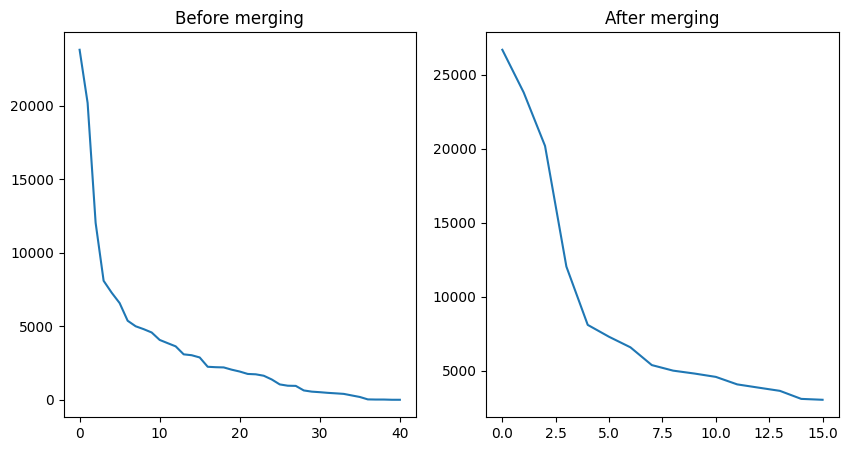

In [38]:
#Checking the number of unique values in each categorical feature
mf = dataset["manufacturer"].value_counts()
#This gives us a graph where the x-axis is the index of the manufacturer and the y-axis is the amount of cars for each manufacturer
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(range(len(mf)), mf)
plt.title("Before merging")
#Merging the 10 least common manufacturers into one category
dataset["manufacturer"] = dataset["manufacturer"].apply(lambda x: x if str(x) in mf[:15] else "other")
mf = dataset["manufacturer"].value_counts()
plt.subplot(1,2,2)
plt.plot(range(len(mf)), mf)
plt.title("After merging")
plt.show()


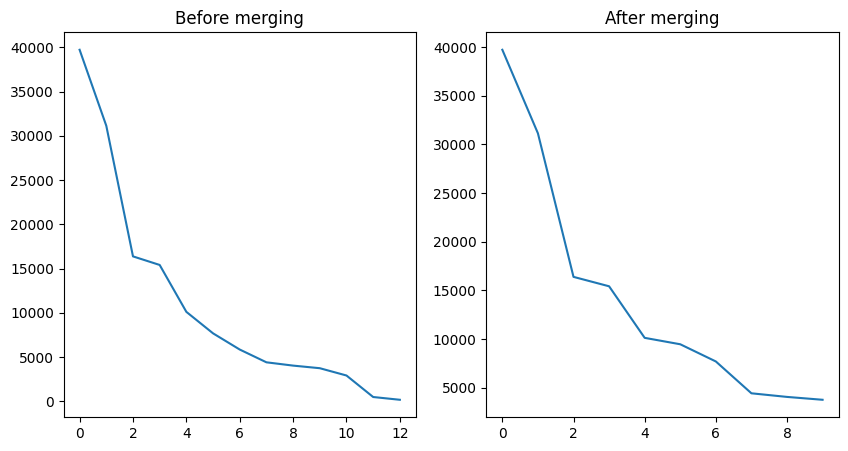

In [39]:
#Same process and idea as above
type = dataset["type"].value_counts()
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(range(len(type)), type)
plt.title("Before merging")
#Merging the 10 least common manufacturers into one category
dataset["type"] = dataset["type"].apply(lambda x: x if str(x) in type[:10] else "other")
type = dataset["type"].value_counts()
plt.subplot(1,2,2)
plt.plot(range(len(type)), type)
plt.title("After merging")
plt.show()


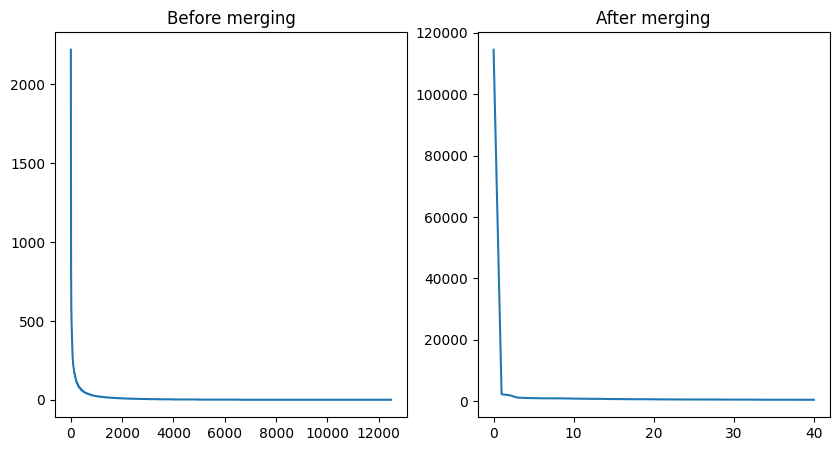

In [40]:
#Same process and idea as above
md = dataset["model"].value_counts()
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(range(len(md)), md)
plt.title("Before merging")
#Merging the 10 least common manufacturers into one category
dataset["model"] = dataset["model"].apply(lambda x: x if str(x) in md[:40] else "other")
md = dataset["model"].value_counts()
plt.subplot(1,2,2)
plt.plot(range(len(md)), md)
plt.title("After merging")
plt.show()

In [41]:
#Checking how many unique values are there in each categorical feature
print(dataset['manufacturer'].unique())
print(dataset['condition'].unique())
print(dataset['drive'].unique())
print(dataset['type'].unique())
print(dataset['paint_color'].unique())
print(dataset['transmission'].unique())
print(dataset['fuel'].unique())
print(dataset['model'].unique())

['ford' 'gmc' 'chevrolet' 'toyota' 'jeep' 'nissan' 'other' 'honda' 'dodge'
 'hyundai' 'ram' 'mercedes-benz' 'bmw' 'volkswagen' 'kia' 'subaru']
['excellent' 'good' 'like new' 'new' 'fair' 'salvage']
['rwd' '4wd' 'fwd']
['truck' 'pickup' 'other' 'coupe' 'SUV' 'hatchback' 'sedan' 'van'
 'convertible' 'wagon']
['black' 'silver' 'grey' 'red' 'blue' 'white' 'brown' 'yellow' 'green'
 'custom' 'purple' 'orange']
['automatic' 'other' 'manual']
['gas' 'other' 'diesel' 'hybrid' 'electric']
['other' 'tacoma' 'camaro ss coupe 2d' 'odyssey' 'accord' 'escape'
 'silverado 1500' 'tahoe' 'silverado' 'f-150' 'impala' 'prius' 'camry'
 'altima' 'charger' 'jetta' 'sierra 1500' 'sonata' '2500' 'wrangler'
 'grand cherokee' 'equinox' 'civic' '1500' 'malibu' 'corvette' 'rav4'
 'outback' 'explorer' 'grand caravan' 'corolla' '4runner' 'f150' 'fusion'
 'cr-v' 'elantra' 'focus' 'mustang' 'silverado 2500hd' 'forester' 'cruze']


## Numerical Data Cleaning

In [42]:
#Description of numerical features
dataset.describe()

,price,odometer,age
count,1.421170e+05,1.421170e+05,142117.000000
mean,5.425552e+04,1.019299e+05,12.439793
std,1.036334e+07,2.012365e+05,9.182634
min,0.000000e+00,0.000000e+00,1.000000
25%,6.300000e+03,4.100500e+04,7.000000
50%,1.299500e+04,9.300000e+04,10.000000
75%,2.459000e+04,1.400000e+05,16.000000
max,3.736929e+09,1.000000e+07,123.000000


In [43]:
#Cleaning the numerical features outliers

#Price
price_high = dataset['price'].quantile(0.95)
price_low = dataset['price'].quantile(0.05)
dataset = dataset[(dataset['price'] < price_high) & (dataset['price'] > price_low)]

#Odometer
odometer_high = dataset['odometer'].quantile(0.98)
odometer_low = dataset['odometer'].quantile(0.02)
dataset = dataset[(dataset['odometer'] < odometer_high) & (dataset['odometer'] > odometer_low)]

#Removing the rows with age > 30
dataset.drop(dataset[dataset.age > 30].index, inplace=True)

#Description of numerical features after cleaning
dataset.describe()

,price,odometer,age
count,118819.000000,118819.000000,118819.000000
mean,15659.517493,99279.687314,11.511349
std,10320.428848,59043.388203,5.639694
min,510.000000,2438.000000,1.000000
25%,6995.000000,47123.000000,7.000000
50%,13333.000000,98389.000000,10.000000
75%,22990.000000,142115.500000,15.000000
max,39788.000000,249800.000000,30.000000


In [44]:
#Shape of the dataset after cleaning
dataset.shape

(118819, 11)

## Data Visualization

Categorical feature visualization

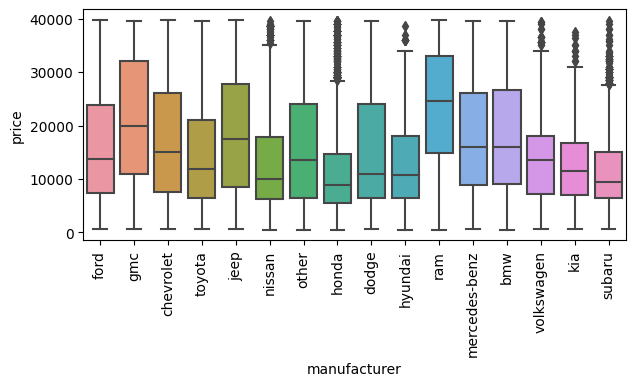

In [45]:
fig = plt.figure(figsize=(7,3))
sns.boxplot(data=dataset, x="manufacturer", y="price")
plt.xticks(rotation=90)
plt.show()

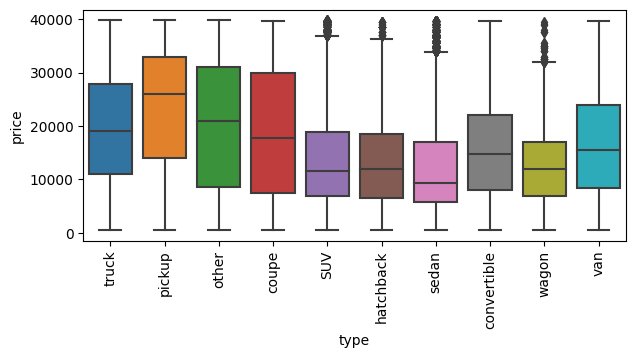

In [46]:
fig = plt.figure(figsize=(7,3))
sns.boxplot(data=dataset, x="type", y="price")
plt.xticks(rotation=90)
plt.show()

For the sake of this notebook not being too long I will not include boxplots for all features

Numerical feature evaluation

C:\Users\zanme\AppData\Local\Temp\ipykernel_15400\349686803.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = dataset.corr()


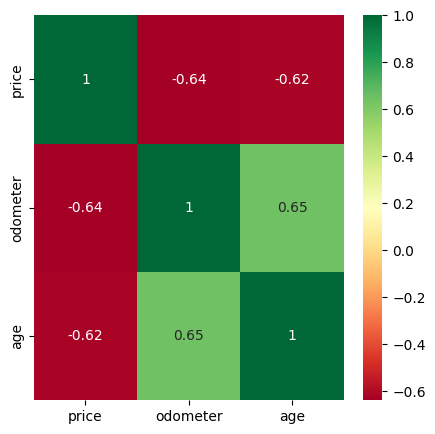

In [47]:
#Correlation heatmap
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
g = sns.heatmap(dataset[top_corr_features].corr(), annot=True, cmap="RdYlGn")

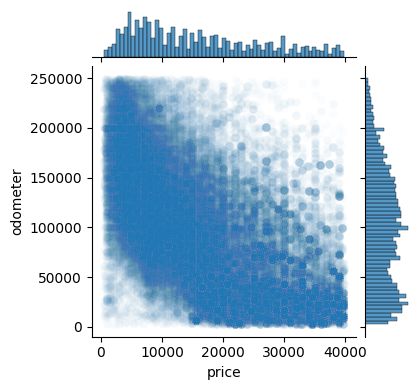

In [48]:
#Price vs Odometer scatter plot
sns.jointplot(data=dataset, x="price", y="odometer", alpha=0.02, kind="scatter", height=4)


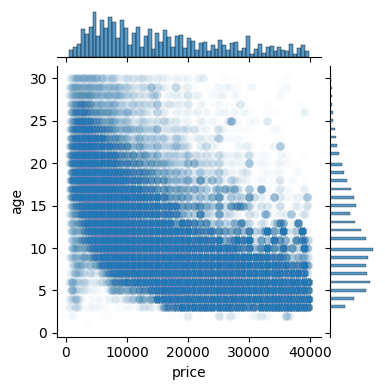

In [49]:
#Price vs age scatter plot
sns.jointplot(data=dataset, x="price", y="age", alpha=0.02, kind="scatter", height=4)

## Data Preprocessing

In [50]:
#Encoding categorical features to numerical values using LabelEncoder
#Finding the categorical features (could do this manually)
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = dataset.columns.values.tolist()
for col in features:
    if dataset[col].dtype in numerics: continue
    categorical_columns.append(col)

# Encoding categorical features
oe = OrdinalEncoder()
dataset[categorical_columns] = oe.fit_transform(dataset[categorical_columns])

dataset.head()

,price,manufacturer,model,condition,fuel,odometer,transmission,drive,type,paint_color,age
31,15000,3.0,29.0,0.0,2.0,128000.0,0.0,2.0,7.0,0.0,10.0
32,27990,4.0,29.0,2.0,2.0,68696.0,2.0,0.0,5.0,0.0,11.0
33,34590,1.0,29.0,2.0,2.0,29499.0,2.0,0.0,5.0,9.0,7.0
34,35000,14.0,38.0,0.0,2.0,43000.0,0.0,0.0,7.0,5.0,4.0
35,29990,1.0,29.0,2.0,2.0,17302.0,2.0,0.0,5.0,8.0,7.0


We dont't need to scale the numerical data because it's not required for random forest

In [51]:
#Splitting the dataset into the independent and dependent variables
X = dataset.iloc[:, 1:] #Independent variables (all columns except the first one (selling_price))
y = dataset.iloc[:, 0] #Dependent variable (the first column - selling_price which is what we want to predict)

In [52]:
X.head()

,manufacturer,model,condition,fuel,odometer,transmission,drive,type,paint_color,age
31,3.0,29.0,0.0,2.0,128000.0,0.0,2.0,7.0,0.0,10.0
32,4.0,29.0,2.0,2.0,68696.0,2.0,0.0,5.0,0.0,11.0
33,1.0,29.0,2.0,2.0,29499.0,2.0,0.0,5.0,9.0,7.0
34,14.0,38.0,0.0,2.0,43000.0,0.0,0.0,7.0,5.0,4.0
35,1.0,29.0,2.0,2.0,17302.0,2.0,0.0,5.0,8.0,7.0


## Model Training

### Some final feature exploration and preprocessing

In [53]:
#Feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

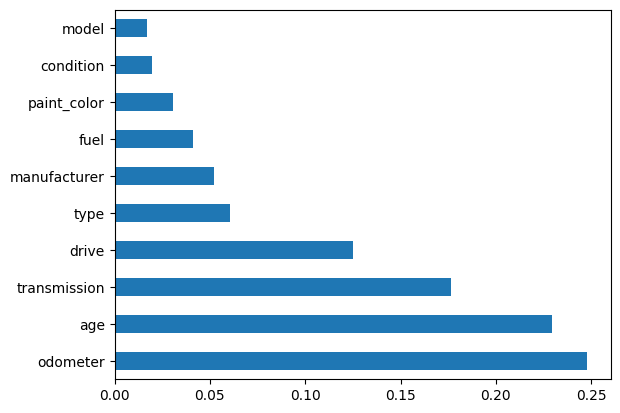

In [54]:
#Plotting the feature importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [55]:
#Keeping only the 10 most important features of the dataset (to increase the speed of training the model)
important_features = feat_importances.nlargest(10)
feature_names = important_features.index.tolist()
X = X[feature_names]
X

,odometer,age,transmission,drive,type,manufacturer,fuel,paint_color,condition,model
31,128000.0,10.0,0.0,2.0,7.0,3.0,2.0,0.0,0.0,29.0
32,68696.0,11.0,2.0,0.0,5.0,4.0,2.0,0.0,2.0,29.0
33,29499.0,7.0,2.0,0.0,5.0,1.0,2.0,9.0,2.0,29.0
34,43000.0,4.0,0.0,0.0,7.0,14.0,2.0,5.0,0.0,38.0
35,17302.0,7.0,2.0,0.0,5.0,1.0,2.0,8.0,2.0,29.0
...,...,...,...,...,...,...,...,...,...,...
426872,19059.0,3.0,2.0,2.0,6.0,9.0,2.0,10.0,2.0,29.0
426873,15080.0,5.0,0.0,2.0,4.0,9.0,2.0,10.0,2.0,29.0
426874,30814.0,5.0,0.0,2.0,6.0,11.0,2.0,10.0,2.0,29.0
426876,12029.0,3.0,2.0,1.0,6.0,11.0,2.0,8.0,2.0,29.0


In [56]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

In [57]:
#Creating the model - Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [58]:
#Hyperparameters 
#Randomized Search CV - to find the best parameters for the model

#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
#Number of features to consider at every split
max_features = [1.0, 'sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
#max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

#We will use these arrays in the Randomized Search CV
#We will use randomize search cv because it is faster than grid search cv

In [59]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf}

#RandomizedSearchCV will use random values from the random_grid dictionary to find the best parameters

In [60]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
#Estimator is the model we want to use
#Param_distributions is the dictionary with the parameters we want to use
#Scoring is the metric we want to use to evaluate the model
#n_iter is the number of iterations we want to run
#cv is the number of folds we want to use for cross validation
#verbose is the level of verbosity (the higher the number, the more information/messages we will get)
#random_state is the seed we want to use
#n_jobs is the number of cores we want to use if set to -1, it will use all the cores (currently set to -2 because I need 1 core for other things :) )
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=32, n_jobs = -2)

In [61]:
#This finds the best parameters for the model and trains it
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-2,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': [1.0, 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=32, scoring='neg_mean_squared_error',
                   verbose=2)

In [62]:
#Get the predictions of the model for the test set
pred = rf_random.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(np.sqrt(mean_squared_error(y_test, pred)))

1895.764539816052
3290.0856524140336


## Model Analysis

<Axes: xlabel='price', ylabel='Count'>

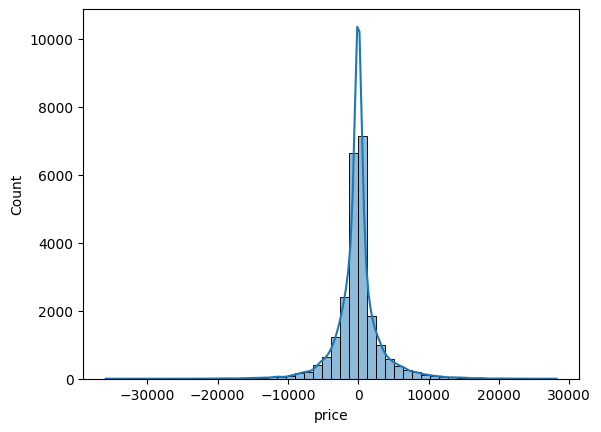

In [63]:
#Plotting the predictions vs the actual values
sns.histplot(y_test-pred, kde=True, bins=50)

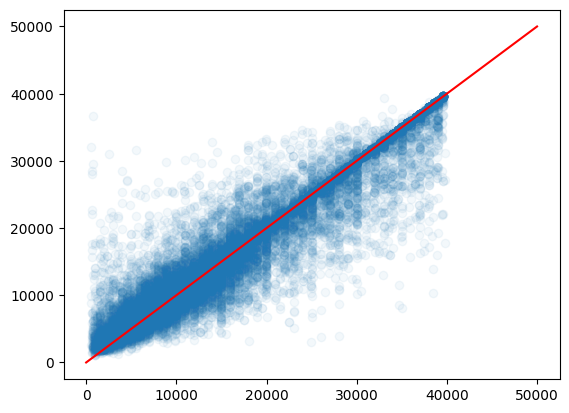

In [64]:
#Plotting the scatter plot of the predictions vs the actual values
plt.scatter(y_test, pred, alpha=0.05)
plt.plot([0, 50000], [0,50000], 'r-')

In [65]:
import pickle
# Pickle the model and encoder so that we can use it later

# open a file, where you ant to store the model
file = open('car_price_prediction_rf_model.pkl', 'wb')
# dump information to that file
pickle.dump(rf_random, file)
file.close()

# open a file, where you ant to store the encoder
file = open('car_price_prediction_encoder.pkl', 'wb')
# dump information to that file
pickle.dump(oe, file)
file.close()

## Example of how to use the model to predict a price

In [66]:
#Create a random test example
test_example = {"age" : 10, "odometer" : 73376, "manufacturer": "ford", "condition" : "good", "paint_color": "white", "model": "explorer"  ,"drive" : "4wd", "transmission" : "automatic", "type" : "SUV", "fuel" : "gas"}
#Convert the test example to a dataframe
test_example = pd.DataFrame(test_example, index=[0])
#Encode the categorical features
test_example[categorical_columns] = oe.transform(test_example[categorical_columns])
#Get the order of the columns used for training the model (the same will need to be used for the test example)
columns = rf_random.feature_names_in_
#Transform the test example to the same order of columns as the training set
test_example = test_example[columns]
#Use the model to predict the price
rf_random.predict(test_example)[0]

15696.309794618352

In [67]:
#Create a random test example
test_example = {"age" : 10, "odometer" : 72000, "manufacturer": "honda", "condition" : "good", "paint_color": "grey", "model": "civic" ,"drive" : "fwd", "transmission" : "automatic", "type" : "hatchback", "fuel" : "gas"}
#Convert the test example to a dataframe
test_example = pd.DataFrame(test_example, index=[0])
#Encode the categorical features
test_example[categorical_columns] = oe.transform(test_example[categorical_columns])
#Get the order of the columns used for training the model (the same will need to be used for the test example)
columns = rf_random.feature_names_in_
#Transform the test example to the same order of columns as the training set
test_example = test_example[columns]
#Use the model to predict the price
rf_random.predict(test_example)[0]

11671.58391050215